In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

C:\Users\varun\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\varun\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\varun\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\varun\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
def read_dataset():
    df = pd.read_csv("G:/Education/Machine Learning/ML_CSV_FILES/sonar_mines_rocks.csv")
    x = df[df.columns[0:60]].values
    y = df[df.columns[60]]
    
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    Y = one_hot_encode(y)
    print(x.shape)
    return(x, Y)

In [3]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels)) 
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [4]:
x,Y = read_dataset()

(207, 60)


In [5]:
x,Y = shuffle(x,Y,random_state = 1)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2, random_state = 0)

In [7]:
print(x_train.shape)

(165, 60)


In [8]:
print(y_train.shape)

(165, 2)


In [9]:
print(x_test.shape)

(42, 60)


In [10]:
learning_rate = 0.3
training_epochs = 1000 # NUMBER OF ITERATIONS TO REDUCE THE ERROR #
cost_history = np.empty(shape = [1], dtype = float)
n_dim = x.shape[1]
print("n_dim", n_dim)
n_class = 2
model_path = "C:/Users/varun/Machine Learning/Tensorflow Implementation"

n_dim 60


In [11]:
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

In [12]:
x = tf.placeholder(tf.float32, [None, n_dim])
w = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
def multilayer_perception(x, weights, biases):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

In [14]:
weights = {
    'h1' : tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2' : tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3' : tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4' : tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out' : tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}

In [15]:
biases = {
    'b1' : tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2' : tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3' : tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4' : tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out' : tf.Variable(tf.truncated_normal([n_class]))
}

In [16]:
init = tf.global_variables_initializer()

In [17]:
saver = tf.train.Saver()

In [18]:
y = multilayer_perception(x, weights, biases)

In [19]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [20]:
sess = tf.Session()
sess.run(init)

In [21]:
mse_history = []
accuracy_history = []

In [22]:
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict = {x : x_train, y_ : y_train})
    cost = sess.run(cost_function, feed_dict = {x : x_train, y_ : y_train})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    pred_y = sess.run(y, feed_dict = {x : x_test})
    mse = tf.reduce_mean(tf.square(pred_y - y_test))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict = {x:x_train, y_:y_train}))
    accuracy_history.append(accuracy)
    
    print('epoch:',epoch, '-', 'cost:',cost, '-MSE:', mse_, "-Train Accuracy:", accuracy)

save_path = saver.save(sess, model_path)
print("Model Saved in File"%save_path)

epoch: 0 - cost: 144.38297 -MSE: 18927.735378561483 -Train Accuracy: 0.44848484
epoch: 1 - cost: 7.9093637 -MSE: 153.540676020119 -Train Accuracy: 0.55151516
epoch: 2 - cost: 8.181445 -MSE: 67.76643356520339 -Train Accuracy: 0.44848484
epoch: 3 - cost: 0.75950843 -MSE: 0.586993978735078 -Train Accuracy: 0.4060606
epoch: 4 - cost: 0.7305318 -MSE: 0.45555897851307575 -Train Accuracy: 0.55151516
epoch: 5 - cost: 0.72252333 -MSE: 0.33865257230376616 -Train Accuracy: 0.35757574
epoch: 6 - cost: 0.7128855 -MSE: 0.3955744941794573 -Train Accuracy: 0.55757576
epoch: 7 - cost: 0.7089563 -MSE: 0.32621008710952876 -Train Accuracy: 0.4121212
epoch: 8 - cost: 0.7057492 -MSE: 0.38007391927171535 -Train Accuracy: 0.55151516
epoch: 9 - cost: 0.7033197 -MSE: 0.3524095072749922 -Train Accuracy: 0.53333336
epoch: 10 - cost: 0.701275 -MSE: 0.38398580512192854 -Train Accuracy: 0.55151516
epoch: 11 - cost: 0.6984495 -MSE: 0.3743477326968686 -Train Accuracy: 0.56363636
epoch: 12 - cost: 0.6931073 -MSE: 0.385

epoch: 102 - cost: 0.5998322 -MSE: 0.9957509823924502 -Train Accuracy: 0.72727275
epoch: 103 - cost: 0.59226346 -MSE: 1.1549353865118848 -Train Accuracy: 0.72727275
epoch: 104 - cost: 0.5835453 -MSE: 1.376688110784863 -Train Accuracy: 0.7151515
epoch: 105 - cost: 0.57536715 -MSE: 1.6040324818119849 -Train Accuracy: 0.72121215
epoch: 106 - cost: 0.5683332 -MSE: 1.8022269769211716 -Train Accuracy: 0.7030303
epoch: 107 - cost: 0.56213367 -MSE: 1.8996447458430048 -Train Accuracy: 0.73333335
epoch: 108 - cost: 0.55686176 -MSE: 2.1339308484876254 -Train Accuracy: 0.72727275
epoch: 109 - cost: 0.55524665 -MSE: 2.070331565668906 -Train Accuracy: 0.73939395
epoch: 110 - cost: 0.5842838 -MSE: 3.0073003029358976 -Train Accuracy: 0.7090909
epoch: 111 - cost: 0.82526696 -MSE: 2.0972029696770327 -Train Accuracy: 0.55151516
epoch: 112 - cost: 1.0623915 -MSE: 8.44211754732026 -Train Accuracy: 0.44848484
epoch: 113 - cost: 0.6749465 -MSE: 0.6109756627521702 -Train Accuracy: 0.57575756
epoch: 114 - cost

epoch: 203 - cost: 0.44327393 -MSE: 7.714214429064795 -Train Accuracy: 0.8181818
epoch: 204 - cost: 0.6797362 -MSE: 4.724121644788314 -Train Accuracy: 0.6848485
epoch: 205 - cost: 1.3594639 -MSE: 25.241825473286543 -Train Accuracy: 0.44848484
epoch: 206 - cost: 0.555026 -MSE: 0.7352426213976513 -Train Accuracy: 0.8181818
epoch: 207 - cost: 0.54222316 -MSE: 1.07571595385587 -Train Accuracy: 0.75151515
epoch: 208 - cost: 0.53353095 -MSE: 0.8930403744666476 -Train Accuracy: 0.8181818
epoch: 209 - cost: 0.5376759 -MSE: 1.3450221494366394 -Train Accuracy: 0.74545455
epoch: 210 - cost: 0.5706565 -MSE: 0.9131458135450389 -Train Accuracy: 0.75757575
epoch: 211 - cost: 0.58009416 -MSE: 1.7691635985998655 -Train Accuracy: 0.6909091
epoch: 212 - cost: 0.6371935 -MSE: 1.115338358614957 -Train Accuracy: 0.6121212
epoch: 213 - cost: 0.5049454 -MSE: 1.1011901916650846 -Train Accuracy: 0.7939394
epoch: 214 - cost: 0.50234306 -MSE: 1.3344373911877487 -Train Accuracy: 0.7878788
epoch: 215 - cost: 0.5172

epoch: 305 - cost: 0.63030887 -MSE: 6.861900766985987 -Train Accuracy: 0.5939394
epoch: 306 - cost: 0.43980265 -MSE: 1.6882716615795244 -Train Accuracy: 0.830303
epoch: 307 - cost: 0.4116921 -MSE: 2.287819907892054 -Train Accuracy: 0.830303
epoch: 308 - cost: 0.39165363 -MSE: 3.0823956185587322 -Train Accuracy: 0.8484849
epoch: 309 - cost: 0.37842882 -MSE: 3.473133493166028 -Train Accuracy: 0.8181818
epoch: 310 - cost: 0.3690125 -MSE: 4.228184020087419 -Train Accuracy: 0.8424242
epoch: 311 - cost: 0.36228845 -MSE: 4.308426349503133 -Train Accuracy: 0.830303
epoch: 312 - cost: 0.36659688 -MSE: 5.741784882296979 -Train Accuracy: 0.8484849
epoch: 313 - cost: 0.46477374 -MSE: 4.264045968762688 -Train Accuracy: 0.7818182
epoch: 314 - cost: 0.92000425 -MSE: 15.619054082346414 -Train Accuracy: 0.58787876
epoch: 315 - cost: 0.90002865 -MSE: 3.21154970038703 -Train Accuracy: 0.57575756
epoch: 316 - cost: 0.64930934 -MSE: 1.5171080290498746 -Train Accuracy: 0.54545456
epoch: 317 - cost: 0.576414

epoch: 407 - cost: 0.4805752 -MSE: 3.107511605198489 -Train Accuracy: 0.8242424
epoch: 408 - cost: 0.41091213 -MSE: 3.705791708753767 -Train Accuracy: 0.8848485
epoch: 409 - cost: 0.35927835 -MSE: 4.099189290866015 -Train Accuracy: 0.8909091
epoch: 410 - cost: 0.33014864 -MSE: 4.754500975502589 -Train Accuracy: 0.8727273
epoch: 411 - cost: 0.31826967 -MSE: 6.041371697931203 -Train Accuracy: 0.8787879
epoch: 412 - cost: 0.3221963 -MSE: 5.533761886292139 -Train Accuracy: 0.8484849
epoch: 413 - cost: 0.37667263 -MSE: 9.092322920215835 -Train Accuracy: 0.8363636
epoch: 414 - cost: 0.59111685 -MSE: 4.427254954158365 -Train Accuracy: 0.73939395
epoch: 415 - cost: 0.58608973 -MSE: 12.772619966660656 -Train Accuracy: 0.6848485
epoch: 416 - cost: 0.6619373 -MSE: 2.5276919130681534 -Train Accuracy: 0.630303
epoch: 417 - cost: 0.4488688 -MSE: 2.0406886180315773 -Train Accuracy: 0.8727273
epoch: 418 - cost: 0.38193688 -MSE: 3.1884311352382584 -Train Accuracy: 0.8484849
epoch: 419 - cost: 0.338699 

epoch: 509 - cost: 0.2782959 -MSE: 5.666258099260359 -Train Accuracy: 0.8969697
epoch: 510 - cost: 0.26515344 -MSE: 6.314662264078138 -Train Accuracy: 0.90909094
epoch: 511 - cost: 0.25785333 -MSE: 6.596983875103586 -Train Accuracy: 0.90909094
epoch: 512 - cost: 0.25363904 -MSE: 6.586011681383866 -Train Accuracy: 0.9030303
epoch: 513 - cost: 0.2551486 -MSE: 7.167715881484955 -Train Accuracy: 0.90909094
epoch: 514 - cost: 0.28941754 -MSE: 5.962236475223845 -Train Accuracy: 0.8545455
epoch: 515 - cost: 0.49557912 -MSE: 11.452563161898762 -Train Accuracy: 0.75757575
epoch: 516 - cost: 0.95619607 -MSE: 4.887647350189787 -Train Accuracy: 0.6363636
epoch: 517 - cost: 0.41549465 -MSE: 6.1490573150312215 -Train Accuracy: 0.8484849
epoch: 518 - cost: 0.35086197 -MSE: 4.300564276927018 -Train Accuracy: 0.8848485
epoch: 519 - cost: 0.3000491 -MSE: 5.225957964630875 -Train Accuracy: 0.8969697
epoch: 520 - cost: 0.27392238 -MSE: 6.152493836271449 -Train Accuracy: 0.8969697
epoch: 521 - cost: 0.2610

epoch: 610 - cost: 0.49649867 -MSE: 6.701759980519417 -Train Accuracy: 0.7939394
epoch: 611 - cost: 0.66566664 -MSE: 14.181850034213543 -Train Accuracy: 0.6484848
epoch: 612 - cost: 0.8353054 -MSE: 3.915705922251113 -Train Accuracy: 0.6
epoch: 613 - cost: 0.4387486 -MSE: 2.212329561313485 -Train Accuracy: 0.8606061
epoch: 614 - cost: 0.34366897 -MSE: 3.477887992383405 -Train Accuracy: 0.8606061
epoch: 615 - cost: 0.28160965 -MSE: 4.984918083369337 -Train Accuracy: 0.92121214
epoch: 616 - cost: 0.24928354 -MSE: 6.603041021336962 -Train Accuracy: 0.91515154
epoch: 617 - cost: 0.23657499 -MSE: 6.6523375524587145 -Train Accuracy: 0.91515154
epoch: 618 - cost: 0.22775172 -MSE: 7.773052355294586 -Train Accuracy: 0.90909094
epoch: 619 - cost: 0.22406518 -MSE: 7.426564203603083 -Train Accuracy: 0.92121214
epoch: 620 - cost: 0.2298566 -MSE: 8.762242346110478 -Train Accuracy: 0.93333334
epoch: 621 - cost: 0.26698557 -MSE: 7.190994039320778 -Train Accuracy: 0.8666667
epoch: 622 - cost: 0.43320516

epoch: 711 - cost: 0.29511464 -MSE: 15.16397701027764 -Train Accuracy: 0.8787879
epoch: 712 - cost: 0.6930254 -MSE: 6.389815869243721 -Train Accuracy: 0.73333335
epoch: 713 - cost: 0.42942238 -MSE: 12.94677104054198 -Train Accuracy: 0.7818182
epoch: 714 - cost: 0.4109424 -MSE: 2.6283906734595104 -Train Accuracy: 0.73939395
epoch: 715 - cost: 0.26794863 -MSE: 5.3415849365531995 -Train Accuracy: 0.9030303
epoch: 716 - cost: 0.21489346 -MSE: 7.061307014704956 -Train Accuracy: 0.92727274
epoch: 717 - cost: 0.19305155 -MSE: 8.378097515312374 -Train Accuracy: 0.93939394
epoch: 718 - cost: 0.1830497 -MSE: 8.64069007861877 -Train Accuracy: 0.92727274
epoch: 719 - cost: 0.18108411 -MSE: 10.357669230636182 -Train Accuracy: 0.94545454
epoch: 720 - cost: 0.18902344 -MSE: 8.994329882522205 -Train Accuracy: 0.92121214
epoch: 721 - cost: 0.25126415 -MSE: 14.208238108320753 -Train Accuracy: 0.8848485
epoch: 722 - cost: 0.5090712 -MSE: 6.696609015791412 -Train Accuracy: 0.7878788
epoch: 723 - cost: 0.3

epoch: 812 - cost: 0.67185104 -MSE: 7.994396374146788 -Train Accuracy: 0.73333335
epoch: 813 - cost: 0.42928323 -MSE: 14.308072979349468 -Train Accuracy: 0.7939394
epoch: 814 - cost: 0.37449878 -MSE: 2.674087628445385 -Train Accuracy: 0.75757575
epoch: 815 - cost: 0.2539809 -MSE: 5.398641242818099 -Train Accuracy: 0.8666667
epoch: 816 - cost: 0.19259347 -MSE: 7.01697288764651 -Train Accuracy: 0.93939394
epoch: 817 - cost: 0.15563108 -MSE: 8.711921686541695 -Train Accuracy: 0.94545454
epoch: 818 - cost: 0.14362484 -MSE: 9.472961548830174 -Train Accuracy: 0.94545454
epoch: 819 - cost: 0.13917813 -MSE: 10.451280480450285 -Train Accuracy: 0.95151514
epoch: 820 - cost: 0.14015143 -MSE: 9.97676108417488 -Train Accuracy: 0.93939394
epoch: 821 - cost: 0.15375623 -MSE: 12.432904938886427 -Train Accuracy: 0.93333334
epoch: 822 - cost: 0.21436976 -MSE: 9.111761094696671 -Train Accuracy: 0.8909091
epoch: 823 - cost: 0.23907256 -MSE: 13.92083895058877 -Train Accuracy: 0.8909091
epoch: 824 - cost: 0

epoch: 913 - cost: 0.30485627 -MSE: 15.537015906571748 -Train Accuracy: 0.8787879
epoch: 914 - cost: 0.2787409 -MSE: 5.320607608986127 -Train Accuracy: 0.830303
epoch: 915 - cost: 0.19451217 -MSE: 8.344265365684848 -Train Accuracy: 0.92121214
epoch: 916 - cost: 0.13430552 -MSE: 12.044431907297266 -Train Accuracy: 0.969697
epoch: 917 - cost: 0.11671244 -MSE: 12.063606187345618 -Train Accuracy: 0.96363634
epoch: 918 - cost: 0.11216239 -MSE: 14.38165548230033 -Train Accuracy: 0.96363634
epoch: 919 - cost: 0.13071696 -MSE: 12.255249368390285 -Train Accuracy: 0.95151514
epoch: 920 - cost: 0.20019984 -MSE: 19.070407430561925 -Train Accuracy: 0.91515154
epoch: 921 - cost: 0.509217 -MSE: 9.924095020772835 -Train Accuracy: 0.8
epoch: 922 - cost: 0.22966067 -MSE: 14.878792900275348 -Train Accuracy: 0.92121214
epoch: 923 - cost: 0.23307544 -MSE: 7.442886100090424 -Train Accuracy: 0.8484849
epoch: 924 - cost: 0.13400266 -MSE: 11.998485902018 -Train Accuracy: 0.95151514
epoch: 925 - cost: 0.1130628

TypeError: not all arguments converted during string formatting

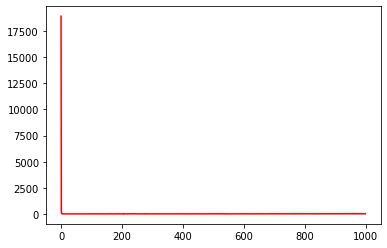

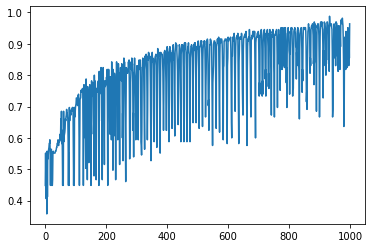

In [23]:
plt.plot(mse_history, 'r')
plt.show()
plt.plot(accuracy_history)
plt.show()

In [25]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
acuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy:", (sess.run(accuracy, feed_dict = {x:x_test, y_:y_test})))

TypeError: Fetch argument 0.96363634 has invalid type <class 'numpy.float32'>, must be a string or Tensor. (Can not convert a float32 into a Tensor or Operation.)

In [24]:
pred_y = sess.run(y, feed_dict={x:x_test})
mse = tf.reduce_mean(tf.square(pred_y - y_test))
print("MSE:%.4f"%sess.run(mse))

MSE:10.8371
